# The Story of The Salton Sea

The Salton sea has been the sight of significant environmental upheaval in recent years as the lake dries up due to climate change. Week hope to explore more thoroughly what is happening in this area and how this impacts the community in the area.

In [2]:
# import packages

import pandas as pd
import geopandas as gpd

import plotly.express as px
import osmnx as ox

import matplotlib.pyplot as plt
import xyzservices.providers as xyz

import numpy as np
import rasterio
import rasterio.plot

# import plotting libraries
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
import contextily as ctx



## Maggie's Stuff

Our first order of houskeeping is to establish the set of census tracts we want to use for plotting: "Our_FIPS"

In [3]:
## Set up some variables
Our_FIPs = [ '06025012301','06025010200',
               '06025010300','06025010400',
               '06025010500','06025010600',
               '06025010700','06025011000',
               '06025011300','06025011400',
               '06025011802','06025011202',
               '06025011201','06025010900',
               '06025010800','06025010300',
               '06025012400','06025010101',
               '06065045604','06065046900',
               '06065045609','06065045606',
               '06065940400','06065045216',
               '06065045304','06065045707',
               '06065045609','06065045605',
               '06065045608','06065045224',
               '06065045606','06065045608',
               '06065045605','06065044403',
               '06073021000','06025012301',
               '06065045605','06025011900',
               '06025011100','06025012302',
               '06025010102','06025011803',
               '06025011600','06025011801',
               '06025012200','06025012100',
               '06025012002','06025011700',
               '06025011500','06065045706',
               '06065045703','6065045705',
               '06065045704'
             ]

## Renewable Energy Development
Step One: Pull all data on power plants from open street map using set coordinates as geographic parameter and define that new data set as "osm_power"<br>
Step Two: Set the crs to espg=4236<br>
Steo Three: Plot osm_power<br>
Step Four: Add the Esri.WorldImagry basemap<br>
Step Five: Pull in when the plants were commissioned and look at how different types have been commissioned over time<br>

year_commissioned  plant_count
0              2013.0            3
1              2018.0            3
2              2012.0            3
3              2016.0            2
4              2020.0            2
5              2014.0            2
6              1985.0            2
7              2021.0            1
8              1989.0            1
9              1996.0            1
10             2000.0            1
11             2008.0            1
12             2019.0            1
13             2017.0            1
14             1993.0            1

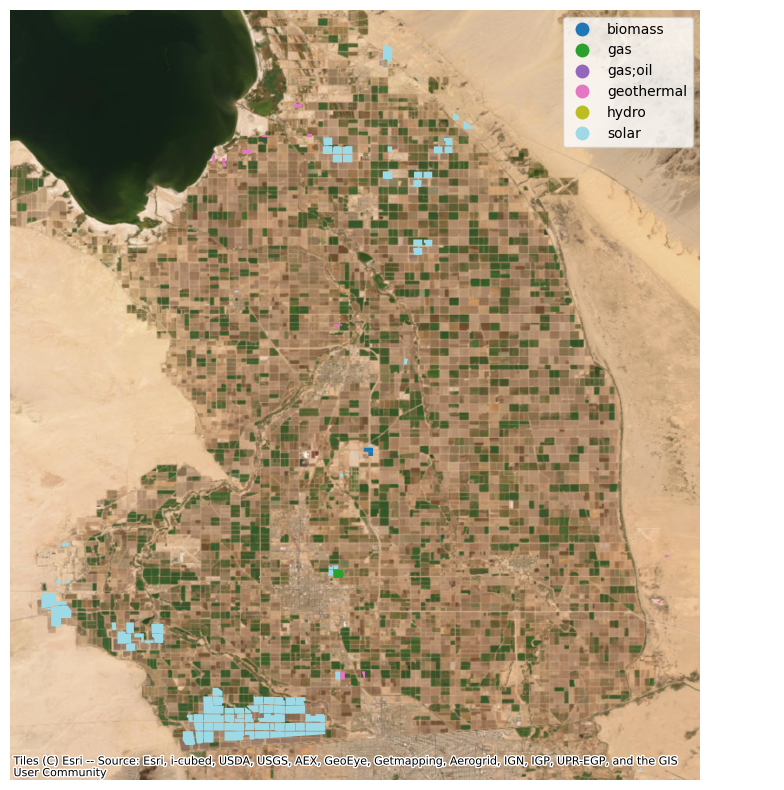

In [6]:
#Step One:
osm_power = ox.geometries_from_bbox(33.334227468796854, 32.65492287146084, -115.83365958918598, -115.25770254774852, tags={'power':'plant'})

#reading and joining the csv where I added dates
osm_power_yrs=pd.read_csv("osm_power_years.csv")
osm_power=osm_power.merge(osm_power_yrs,on='name')

#Step Two: 
osm_power = osm_power.to_crs(epsg=4236)
fig, ax = plt.subplots(figsize=(10,10))

#Step Three:
osm_power.plot(ax=ax,
         column='plant:source',
         cmap='tab20',
         legend=True)
ax.axis('off')

#Step Four: 
ctx.add_basemap(ax=ax,
                crs=osm_power.crs.to_string(),
                source=xyz.Esri.WorldImagery
                )

#Step Five -- Creating a count of plants by year, but want to include the plant:source column and Im running into issues.. HELP!
#Thought this might be a good way to incorporate a bar chart!! 

plants_by_year =osm_power.year_commissioned.value_counts().rename_axis('year_commissioned').reset_index(name='plant_count')
plants_by_year

## Waterways in the Imperial Valley
Step One: Pull all data on waterways from open street map using set coordinates as geographic parameter and define that new data set as "osm_water" <br>
Step Two: Set the crs to espg=4236 <br>
Steo Three: Plot osm_water <br>
Step Four: Add the Esri.WorldImagry basemap

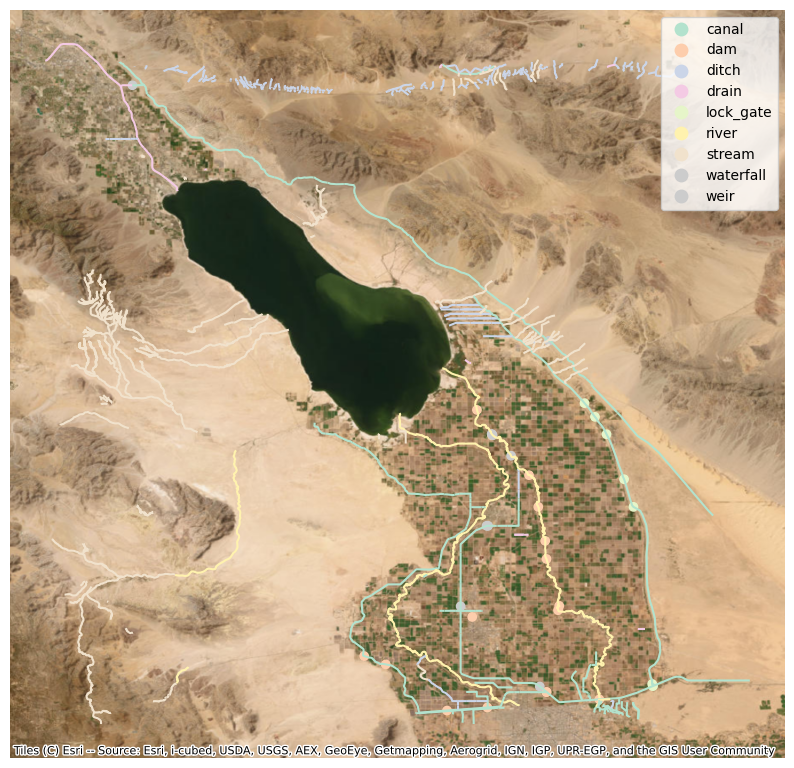

In [7]:

#Step One
osm_water = ox.geometries_from_bbox(33.701090957662295, 32.65492287146084, -116.20425754271368, -115.25770254774852, tags={'waterway':True})

#Step Two:
osm_water = osm_water.to_crs(epsg=4236)

#Step Three:
fig, ax = plt.subplots(figsize=(10,10))
osm_water.plot(ax=ax,
         column='waterway',
         cmap='Pastel2',
         legend=True)
ax.axis('off')

#Step Four:
ctx.add_basemap(ax=ax,
                crs=osm_power.crs.to_string(),
                source=xyz.Esri.WorldImagery
                )

## Asthma Mapping
Step One: Get the asthma data from calenviroscreen data<br>
Step Two: Clean up the FIPs Codes by changing to strings and adding leading zeros<br>
Step Three: Create a geodataframe that is just made up of the FIPs codes / census tracts we defined under above (see housekeeping)<br>
Step Four: Plot 'AsthmaP' variable from CalEnviroScreen over the Esri.WorldImgry Map <br>

- 'AsthmaP' variable describes how the rates in a given tract compares to other tracts across the state (percentile) <br>
- For example, a dark region in the 90th percentile means that the rates in that tract are higher than 90% of all other tracts<br>

Step Five: Plot Asthma variable from CalEnviroscreen over the Esri.WorldImagry Map <br>
- 'Asthma' variable is the number of trips to the emergency department per 10,000 people

(-116.98409285041606,
 -114.32948814952228,
 32.54557930245018,
 34.15294612860471)

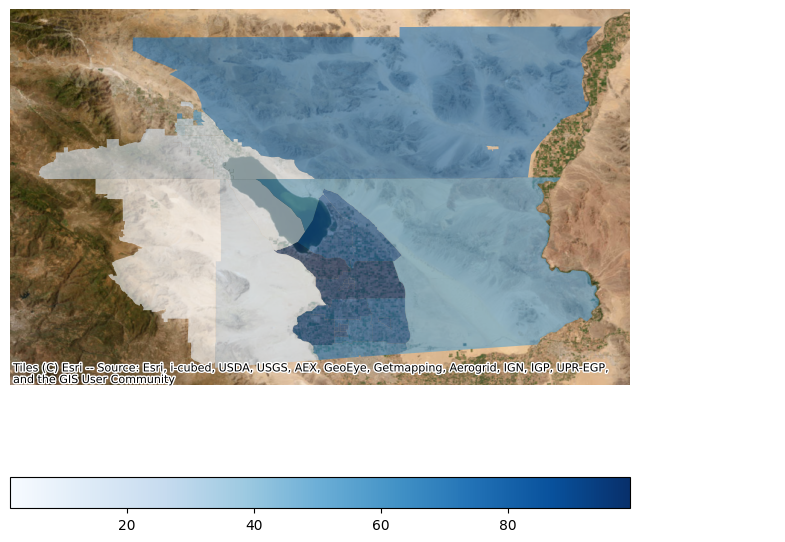

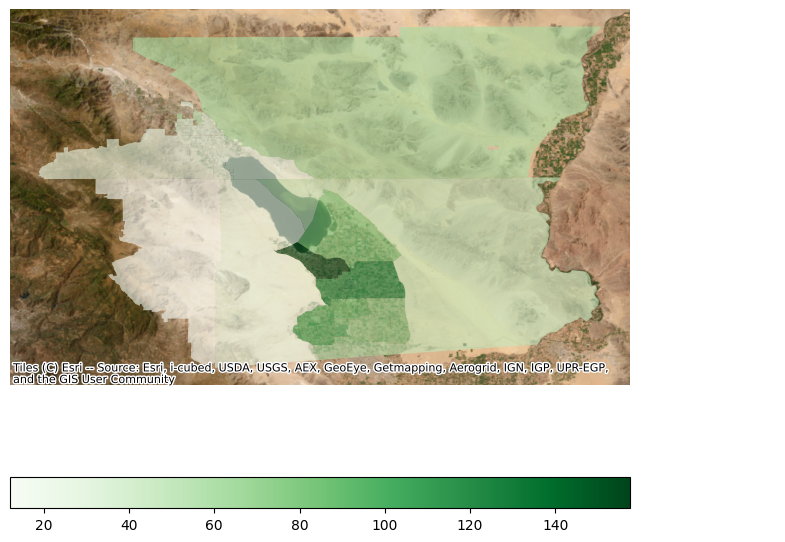

In [13]:
#Step One: 
calenviro_file = "data/CalEnviroScreen/calenviroscreen.zip"
calenviro = gpd.read_file(calenviro_file)

#Step Two:
calenviro['Tract'] = calenviro['Tract'].astype('int')
calenviro['Tract'] = calenviro['Tract'].astype('str')
calenviro["Tract"] = calenviro["Tract"].str.zfill(11)

#Step Three:
calenv_gdf= calenviro[calenviro['Tract'].isin(Our_FIPs)]

# Step Four:
calenv_gdf = calenv_gdf.to_crs(epsg=4236)
fig,ax = plt.subplots(figsize=(8,8))
calenv_gdf.plot(ax=ax,
               column='AsthmaP',
               legend=True,
               cmap='Blues',
               alpha=0.6,
              legend_kwds={"orientation": "horizontal"}
              )
ctx.add_basemap(ax=ax,
                crs=calenv_gdf.crs.to_string(),
                source=ctx.providers.Esri.WorldImagery
                )
ax.axis('off')

#Step Five:
calenv_gdf = calenv_gdf.to_crs(epsg=4236)
fig,ax = plt.subplots(figsize=(8,8))
calenv_gdf.plot(ax=ax,
               column='Asthma',
               legend=True,
               cmap='Greens',
               alpha=0.6,
              legend_kwds={"orientation": "horizontal"}
              )
ctx.add_basemap(ax=ax,
                crs=calenv_gdf.crs.to_string(),
                source=ctx.providers.Esri.WorldImagery
                )
ax.axis('off')

## Seth's Landcover Stuff

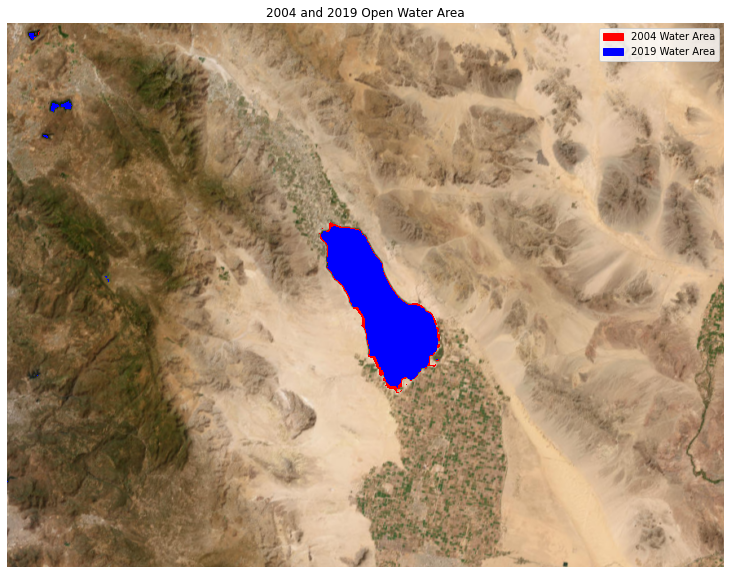

In [7]:
years = [2004, 2019] # create a list of the comparison years to loop over
data = {} # Create an empty dictionary to save the raster dataset to 
data_masked = {} # Create empty dictionary to save masked numpy array to

#Loop through years specified to create data needed to plot
for year in years:
    data[year] = rasterio.open(f'data/NLCD/NLCD_{str(year)}_Land_Cover_L48_20210604_gyGbthZM9gweVLuKaW5e.tiff') # open raster and create element in 'data' dict.
    data_masked[year] = np.ma.masked_where(data[year].read(1)!=11, data[year].read(1)) # mask raster to show only were data is '11' (Open Water)


# ### Mapping Change in Water Cover
# 
# Now that we have our data prepared and masked we can overlay the 2004 and 2019 data we can overlay them to highlight the areas where there used to be water but is now dry lakebed.

fig, ax = plt.subplots(figsize=(15,10)) # create a figure and axis object to map onto and set the figure size.
plt.imshow(data_masked[years[1]], extent=rasterio.plot.plotting_extent(data[years[1]]), cmap=ListedColormap(['blue']), zorder= 15) #plot data, set extent to geography, set color and drawing order
plt.imshow(data_masked[years[0]], extent=rasterio.plot.plotting_extent(data[years[0]]), cmap=ListedColormap(['red']), zorder= 10)

# creates legend items
handles = [
    Patch(color='red', label='2004 Water Area'),
    Patch(color='blue', label='2019 Water Area')
]

ctx.add_basemap(ax, crs=data[2004].read_crs(), source=ctx.providers.Esri.WorldImagery, zorder=5)
plt.axis('off')
plt.title('2004 and 2019 Open Water Area')
ax.legend(handles=handles)

plt.show()

In [8]:
count_19 = np.count_nonzero(data[2019].read(1) == 11)
count_04 = np.count_nonzero(data[2004].read(1) == 11)

sq_km = (count_04 - count_19)*900/1e6

print(f'The area surface area of water lost between 2004 and 2019 was {sq_km} square kilometers.')

The area surface area of water lost between 2004 and 2019 was 68.4603 square kilometers.


<bound method _AxesBase.get_xaxis of <AxesSubplot:xlabel='Land Cover', ylabel='Area of Land (square km)'>>

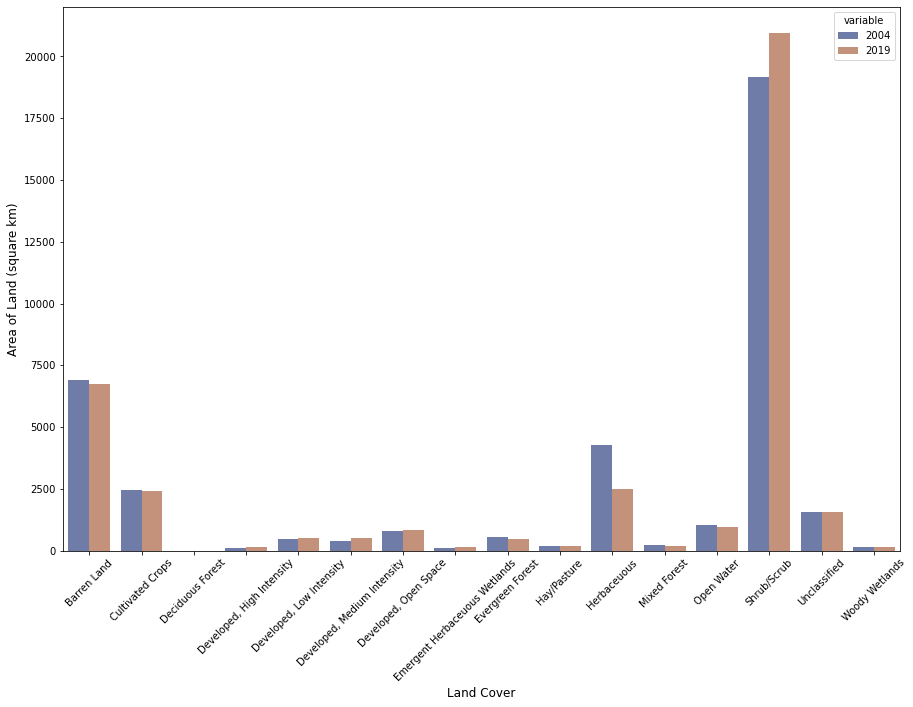

In [9]:
data_dict = pd.read_csv('data/NLCD/NLCD_landcover_legend_2018_12_17_gyGbthZM9gweVLuKaW5e.csv')
data_dict.dropna(axis=0, inplace=True) # Drop values with no legend information
legend = dict(zip(data_dict['Value'], data_dict['Legend'])) # save values and legend item as a dictionary for ease of use later.


# Create numpy arrays that are labeled instead of just as integers
labeled_data = {} #create an empty dict to fill
for year in years:
    labeled_data[year] = np.vectorize(legend.get)(data[year].read(1)) # fill dict item with np array where elements are labeled strings

# count cells of each land cover type for each year
counts_04 = np.unique(labeled_data[2004], return_counts=True)
counts_19 = np.unique(labeled_data[2019], return_counts=True)

# Create dataframe with landcover type and count for each year
df = pd.DataFrame(list(zip(counts_04[0],counts_04[1], counts_19[1])), columns=['landcover', '2004', '2019']) 
df['2004'] = df['2004']*900/1e6 # calculate as area in sq km
df['2019'] = df['2019']*900/1e6
df.head()

# %%
df_long = pd.melt(df, id_vars='landcover', value_vars=['2004','2019']) # convert to a "long" data frame that is better for plotting side by side

# %%
# Plot the land cover area as a bar chart side by side
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))

sns.barplot( 
    ax=ax, data=df_long,
    x='landcover', y='value', hue='variable',
    palette='dark', alpha=.6,
)
plt.xlabel('Land Cover', fontsize=12)
plt.ylabel('Area of Land (square km)', fontsize=12)
plt.xticks(rotation=45)
ax.get_xaxis

## Miriam's Stuff

## Exploring the demographics of the populations living in Imperial County. 
## Looking at Household Income and Occupation data for Census Tracts in Imperial County.
  
Step 1: Get the income and occupation data from Social Explorer (ACS 2021)

Step 2: Clean up data by fixing FIPS codes, parceling data into two dataframes in order to answer different questions about income and occupation. 

Step 3: Import shapefile with all the geodata and merge the file with the newly created occupation and income dataframes.

Step 4: Plot Farming, Fishing and Forestry Occupation over the Esri.WorldImgry Map to see where those jobs are most concentrated as compared to the the plot of Management, Business, and Financial Operations  Occupations. The darker the colors on each map, the higher the percentage in the selected profession. 

Step 5: Plot % of each income bracket in census tracts immediately below and adjacent to the Salton Sea. 

In [2]:
#import the ACS data from Social Explorer
df=pd.read_csv('data/occupation_income/new_data_clean_Notebook.csv')

# Convert Geo_FIPS to a string
df = pd.read_csv(
    'data/occupation_income/new_data_clean_Notebook.csv',
    dtype=
    {
        'Geo_FIPS':str,
     }
)

# add zeros to front of FIPS code
df['Geo_FIPS']=df['Geo_FIPS'].str.zfill(11)

#filter for columns that only have null values and then drop them. 
df.columns[df.isna().all()].tolist()
df = df.dropna(axis=1,how="all")
df.head()

Geo_FILEID Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_STATE  \
0      ACSSF         ca         140            0          3857          6   
1      ACSSF         ca         140            0          3858          6   
2      ACSSF         ca         140            0          3859          6   
3      ACSSF         ca         140            0          3860          6   
4      ACSSF         ca         140            0          3861          6   

   Geo_COUNTY  Geo_TRACT           Geo_GEOID             Geo_NAME  ...  \
0          25      10101  14000US06025010101  Census Tract 101.01  ...   
1          25      10102  14000US06025010102  Census Tract 101.02  ...   
2          25      10200  14000US06025010200     Census Tract 102  ...   
3          25      10300  14000US06025010300     Census Tract 103  ...   
4          25      10401  14000US06025010401  Census Tract 104.01  ...   

  PCT_SE_A14001_008 PCT_SE_A14001_009  PCT_SE_A14001_010  PCT_SE_A14001_011  \
0              0.00              0.00               0.00               0.00   
1              9.04              3.07              14.25               8.51   
2              4.75              2.38               0.79               8.72   
3              7.94              2.78               1.19               2.38   
4              5.65              6.06               0.00              10.88   

   PCT_SE_A14001_012  PCT_SE_A14001_013  PCT_SE_A14001_014  PCT_SE_A14001_015  \
0               0.00               0.00               0.00               0.00   
1               4.67               3.52               6.82               1.76   
2               7.13               7.61               3.33               4.44   
3              17.06               9.52               7.94               7.14   
4               1.65               3.44               0.00               3.72   

   PCT_SE_A14001_016  PCT_SE_A14001_017  
0               0.00               0.00  
1               0.00               0.00  
2               3.33               5.23  
3              11.51               7.54  
4               0.55               0.00  

[5 rows x 102 columns]

In [3]:
df.Geo_FIPS.head()

0    06025010101
1    06025010102
2    06025010200
3    06025010300
4    06025010401
Name: Geo_FIPS, dtype: object

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
columns_to_keep = ['Geo_FIPS',
            'PCT_SE_B17008_002',
            'PCT_SE_B17008_003',
            'PCT_SE_B17008_004',
            'PCT_SE_B17008_005',
            'PCT_SE_B17008_006',
            'PCT_SE_B17008_007',
            'PCT_SE_B17008_008',
            'PCT_SE_B17008_009',
            'PCT_SE_B17008_010',
            'PCT_SE_B17008_011',
            'PCT_SE_B17008_012',
            'PCT_SE_B17008_013',
            'PCT_SE_B17008_014',
                  ]
# add it to a new dataframe
df2 = df[columns_to_keep] 
df2.columns = ['FIPS', #relabel columns with meaningful variables
    'Management, Business, and Financial Operations  Occupations',
    'Professional and Related Occupations',
    'Healthcare Support Occupations',
    'Protective Service Occupations',
    'Food Preparation and Serving Related Occupations',
    'Building and Grounds Cleaning and Maintenance Occupations',
    'Personal Care and Service Occupations',
    'Sales and Related Occupations',
    'Office and Administrative Support Occupations',
    'Farming, Fishing, and Forestry Occupations',
    'Construction, Extraction, and Maintenance Occupations',
    'Production Occupations',
    'Transportation and Material Moving Occupations']

In [12]:
tracts=gpd.read_file('data/occupation_income/tl_2022_06_tract.shp')
tracts = tracts[['GEOID','geometry']]
tracts['FIPS'] = tracts['GEOID']
tracts_occupation=tracts.merge(df2,on="FIPS")
tracts_occupation.head()

GEOID                                           geometry  \
0  06025011500  POLYGON ((-115.57003 32.79704, -115.57002 32.7...   
1  06025011803  POLYGON ((-115.59501 32.77381, -115.59458 32.7...   
2  06025010600  POLYGON ((-115.58198 32.94896, -115.58186 32.9...   
3  06025011201  POLYGON ((-115.59499 32.79316, -115.59498 32.7...   
4  06025012302  POLYGON ((-116.05975 33.42598, -116.05960 33.4...   

          FIPS  Management, Business, and Financial Operations  Occupations  \
0  06025011500                                               4.44             
1  06025011803                                              14.02             
2  06025010600                                              11.88             
3  06025011201                                              13.53             
4  06025012302                                               8.47             

   Professional and Related Occupations  Healthcare Support Occupations  \
0                                 11.60                            9.94   
1                                 24.64                            1.46   
2                                 17.37                            8.83   
3                                 22.32                            8.56   
4                                  3.80                            6.30   

   Protective Service Occupations  \
0                            1.82   
1                           11.07   
2                           12.85   
3                            9.78   
4                            1.54   

   Food Preparation and Serving Related Occupations  \
0                                              7.27   
1                                              5.63   
2                                              5.38   
3                                              3.42   
4                                              7.74   

   Building and Grounds Cleaning and Maintenance Occupations  \
0                                               5.02           
1                                               3.50           
2                                               3.48           
3                                               6.16           
4                                              13.85           

   Personal Care and Service Occupations  Sales and Related Occupations  \
0                                   1.39                          10.42   
1                                   4.01                           5.94   
2                                   0.36                           5.92   
3                                   1.71                           9.29   
4                                   2.02                           4.91   

   Office and Administrative Support Occupations  \
0                                           7.91   
1                                           9.57   
2                                           9.22   
3                                          14.29   
4                                           9.28   

   Farming, Fishing, and Forestry Occupations  \
0                                        8.28   
1                                        2.99   
2                                        1.04   
3                                        2.70   
4                                       10.34   

   Construction, Extraction, and Maintenance Occupations  \
0                                               9.89       
1                                               4.41       
2                                              15.00       
3                                               3.69       
4                                              11.06       

   Production Occupations  Transportation and Material Moving Occupations  
0                    7.48                                           14.54  
1                    8.72                                            4.04  
2                    1.51                                            7.18  
3    

(-116.1884411, -114.3807209, 32.5777133, 33.4745807)

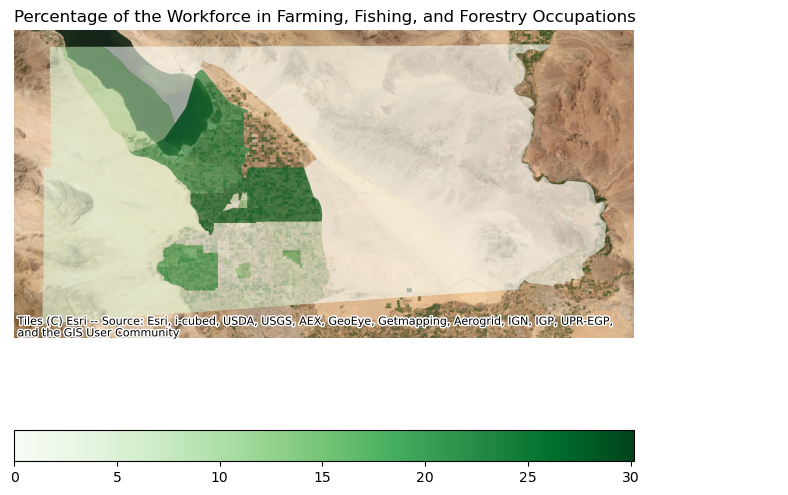

In [22]:
tracts_occupation = tracts_occupation.to_crs(epsg=4236)
fig,ax = plt.subplots(figsize=(8,8))
tracts_occupation.plot(ax=ax,
               column='Farming, Fishing, and Forestry Occupations',
               legend=True,
               cmap='Greens',
               alpha=0.6,
              legend_kwds={"orientation": "horizontal"}
              )
plt.title('Percentage of the Workforce in Farming, Fishing, and Forestry Occupations')
ctx.add_basemap(ax=ax,
                crs=tracts_occupation.crs.to_string(),
                source=ctx.providers.Esri.WorldImagery
                )
ax.axis('off')

(-116.1884411, -114.3807209, 32.5777133, 33.4745807)

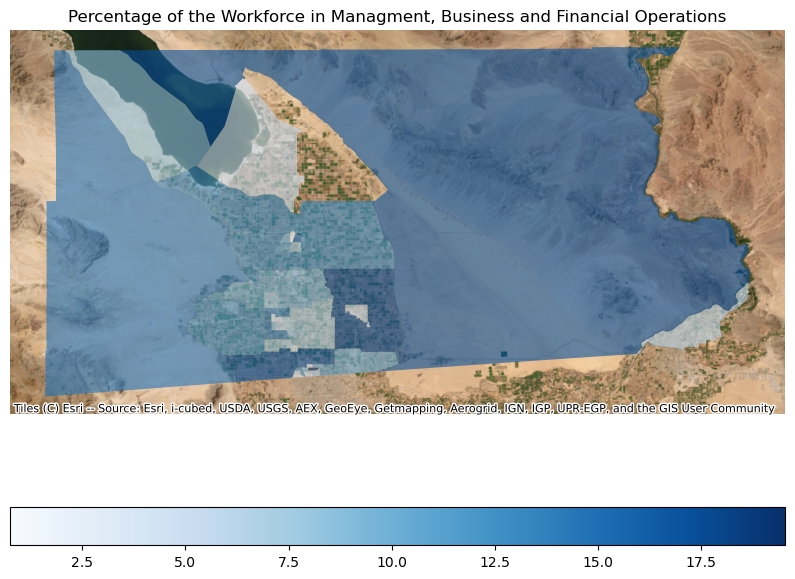

In [25]:
tracts_occupation = tracts_occupation.to_crs(epsg=4236)
fig,ax = plt.subplots(figsize=(10,8))
tracts_occupation.plot(ax=ax,
               column='Management, Business, and Financial Operations  Occupations',
               legend=True,
               cmap='Blues',
               alpha=0.6,
              legend_kwds={"orientation": "horizontal"}
              )
plt.title('Percentage of the Workforce in Managment, Business and Financial Operations')
ctx.add_basemap(ax=ax,
                crs=tracts_occupation.crs.to_string(),
                source=ctx.providers.Esri.WorldImagery
                )
ax.axis('off')

Next we make a dataframe with income data for each census tract

In [16]:
columns_to_keep = ['Geo_FIPS',
                     'PCT_SE_A14001_002',
            'PCT_SE_A14001_003',
            'PCT_SE_A14001_004',
            'PCT_SE_A14001_005',
            'PCT_SE_A14001_006',
            'PCT_SE_A14001_007',
            'PCT_SE_A14001_008',
            'PCT_SE_A14001_009',
            'PCT_SE_A14001_010',
            'PCT_SE_A14001_011',
            'PCT_SE_A14001_012',
            'PCT_SE_A14001_013',
            'PCT_SE_A14001_014',
            'PCT_SE_A14001_015',
            'PCT_SE_A14001_016',
            'PCT_SE_A14001_017'
                  ]
# add it to a new dataframe
df3 = df[columns_to_keep] 
df3.columns = ['FIPS',   
            'Less than $10,000',
            '10,000 to 14,999',
            '15,000 to 19,999',
            '20,000 to 24,999',
            '25,000 to 29,999',
            '30,000 to 34,999',
            '35,000 to 39,999',
            '40,000 to 44,999',
            '45,000 to 49,999',
            '50,000 to 59,999',
            '60,000 to 74,999',
            '75,000 to 99,999',
            '100,000 to 124,999',
            '125,000 to 149,999',
            '150,000 to 199,999',
            '200,000 or More']

df3.head()

FIPS  Less than $10,000  10,000 to 14,999  15,000 to 19,999  \
0  06025010101              20.93             74.42              4.65   
1  06025010102              22.45             13.79              4.60   
2  06025010200               9.03              9.51              5.39   
3  06025010300               7.14              1.19              0.79   
4  06025010401               5.65             16.12              9.09   

   20,000 to 24,999  25,000 to 29,999  30,000 to 34,999  35,000 to 39,999  \
0              0.00              0.00              0.00              0.00   
1              0.84              5.90              0.77              9.04   
2              3.17              8.40             16.80              4.75   
3              4.76              7.54              3.57              7.94   
4             29.48              0.00              7.71              5.65   

   40,000 to 44,999  45,000 to 49,999  50,000 to 59,999  60,000 to 74,999  \
0              0.00              0.00              0.00              0.00   
1              3.07             14.25              8.51              4.67   
2              2.38              0.79              8.72              7.13   
3              2.78              1.19              2.38             17.06   
4              6.06              0.00             10.88              1.65   

   75,000 to 99,999  100,000 to 124,999  125,000 to 149,999  \
0              0.00                0.00                0.00   
1              3.52                6.82                1.76   
2              7.61                3.33                4.44   
3              9.52                7.94                7.14   
4              3.44                0.00                3.72   

   150,000 to 199,999  200,000 or More  
0                0.00             0.00  
1                0.00             0.00  
2                3.33             5.23  
3               11.51             7.54  
4                0.55             0.00

In [17]:
tracts_income=tracts.merge(df3,on="FIPS")

(-116.1884411, -114.3807209, 32.5777133, 33.4745807)

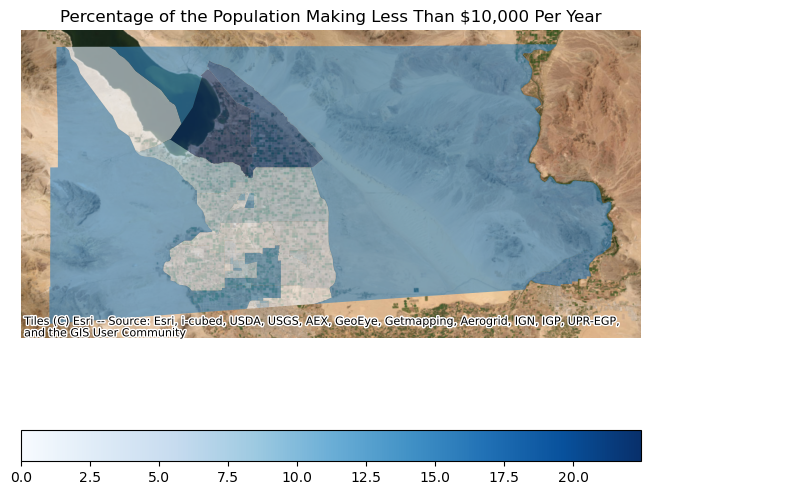

In [26]:
tracts_income = tracts_income.to_crs(epsg=4236)
fig,ax = plt.subplots(figsize=(8,8))
tracts_income.plot(ax=ax,
               column='Less than $10,000',
               legend=True,
               cmap='Blues',
               alpha=0.6,
              legend_kwds={"orientation": "horizontal"}
              )
plt.title('Percentage of the Population Making Less Than $10,000 Per Year')
ctx.add_basemap(ax=ax,
                crs=tracts_income.crs.to_string(),
                source=ctx.providers.Esri.WorldImagery
                )
ax.axis('off')

## Tiffany's Stuff

## Exploring the proportion of land that is considered to be in a drought in Imperial, San Diego & Riverside County
## Data was obtained from US Drought Monitoring System

Next I upload my data, and inspect it to ensure that it has loaded properly.

In [27]:
import datetime #import necessary datetime type

countydf=pd.read_csv('data/Drought/RiversideImperialDrought.csv', parse_dates=['ValidStart']) #import data and read a date field as a datetime type
countydf.set_index('ValidStart',inplace=True) #set date field as index for plotting

countydf.head() #examine the data

MapDate  FIPS           County State  None     D0     D1   D2  \
ValidStart                                                                   
2023-02-07  20230207  6025  Imperial County    CA   0.0  47.65  52.35  0.0   
2023-01-31  20230131  6025  Imperial County    CA   0.0  47.65  52.35  0.0   
2023-01-24  20230124  6025  Imperial County    CA   0.0  47.65  52.35  0.0   
2023-01-17  20230117  6025  Imperial County    CA   0.0  47.65  52.35  0.0   
2023-01-10  20230110  6025  Imperial County    CA   0.0  47.65  52.35  0.0   

             D3   D4    ValidEnd  StatisticFormatID  
ValidStart                                           
2023-02-07  0.0  0.0  2023-02-13                  2  
2023-01-31  0.0  0.0  2023-02-06                  2  
2023-01-24  0.0  0.0  2023-01-30                  2  
2023-01-17  0.0  0.0  2023-01-23                  2  
2023-01-10  0.0  0.0  2023-01-16                  2

The way this data is structured, each record shows the percentage of the area of the county in a given level of drought (from D0 to D4) at a time. To show this we can show the approximate levels of drought in a given county over time.

We create a function that will create a stacked area plot to showcase the portion of the county in a given level of drought at a given time. I can then call this function in a loop to return a graph for each county in the data.

In [28]:
def drought_graph(df:pd.DataFrame, county:str):
    """
    Graph Levels of drought over time for a given county
    
    Keyword arguments:
    df -- Pandas Dataframe with D0 through D4 drought levels.
    county -- string with county name in the format of 'Blank County'.
    """
    df = df[df['County']==county]
    fig, ax = plt.subplots(figsize=(12,8))
    df[['D0', 'D1','D2', 'D3', 'D4']].plot.area(ax=ax)

    plt.xlabel('Date')
    plt.ylabel('Percentage of County Area in Drought')

    plt.title(f'{county} Drought Level: January 2022 to Present')

Now that we have a function we can create a list of the counties we need and loop through this list to create graphs for each county.

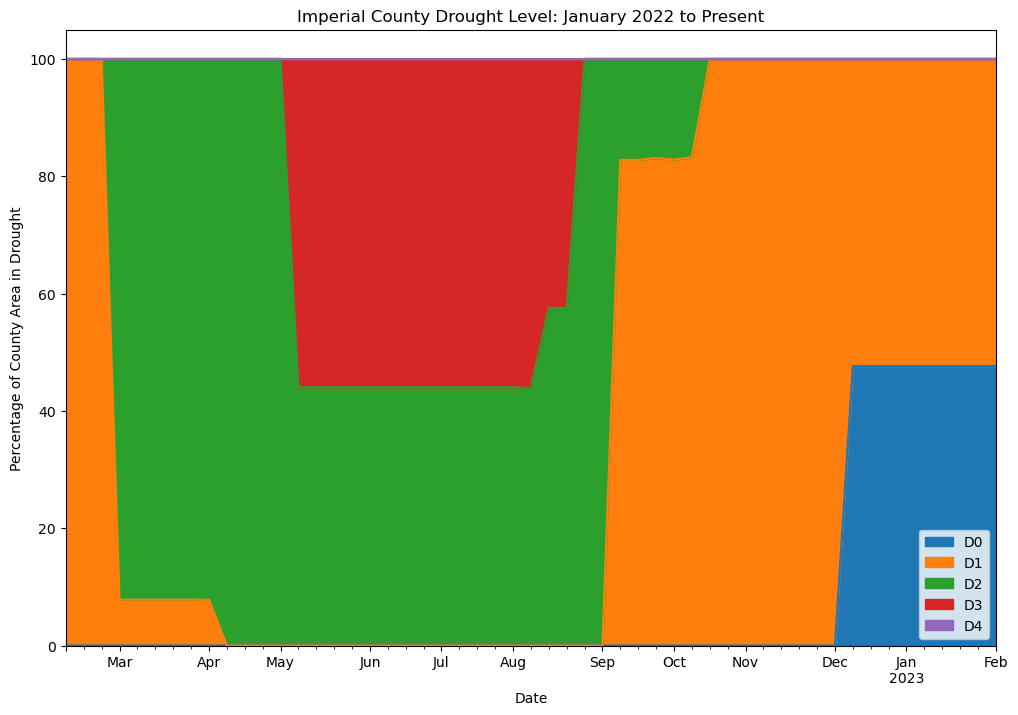

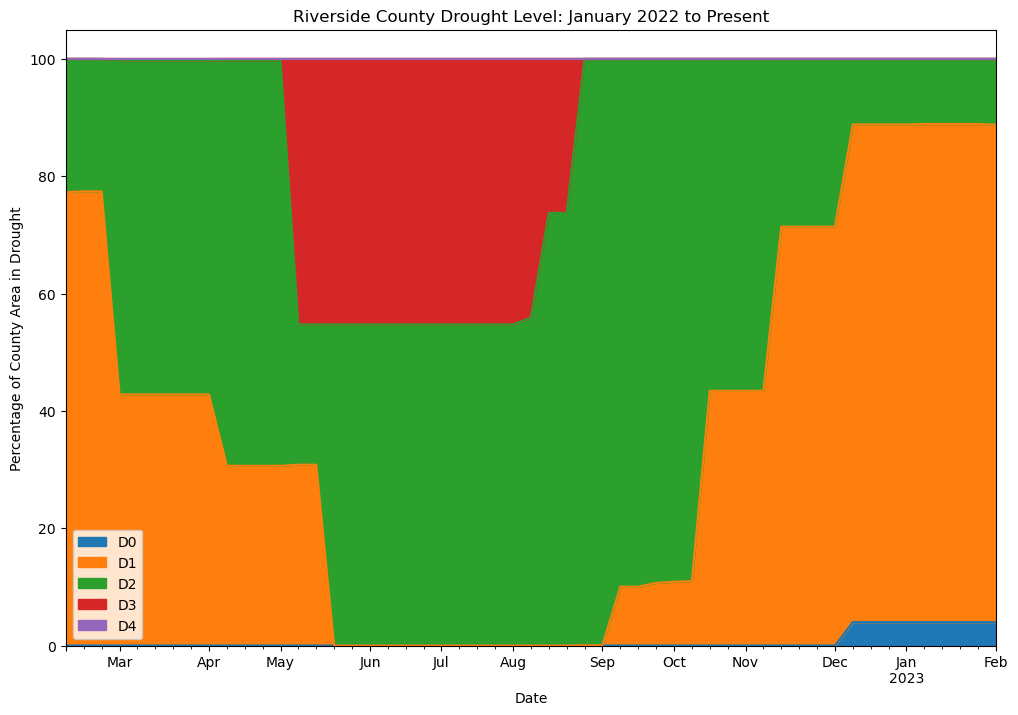

In [29]:
counties = countydf['County'].unique() #create a list of counties in the dataset to loop over

for county in counties: #loop through the counties and graph
    drought_graph(countydf, county=county)